In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
import copy

In [382]:
data_galileo_sun = pd.read_excel('data_galileo_sun.xlsx', header=None)
data_earth = pd.read_excel('earth.xlsx' , header = None)
data_jupiter = pd.read_excel('jupiter.xlsx' , header = None)

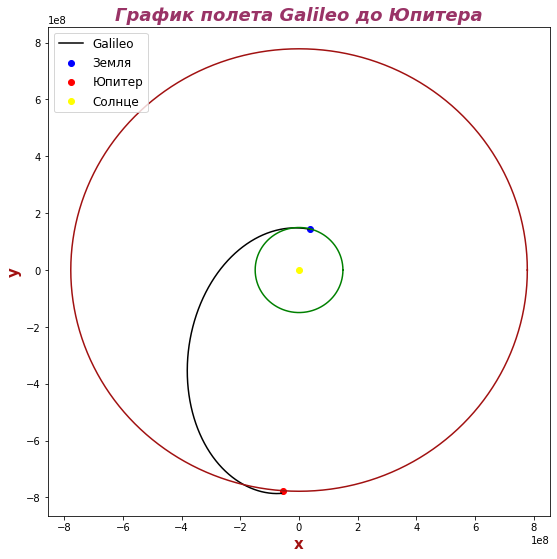

In [3]:
plt.figure(figsize=(9, 9))
plt.title('График полета Galileo до Юпитера', fontsize=18, fontweight='bold', color='#993366', fontstyle = 'oblique')   
plt.xlabel('x', fontsize=15, fontweight='bold',color='#a11111')
plt.ylabel('y', fontsize=15, fontweight='bold', color='#a11111')

rad1 = 149.6e6
rad2 = 778.33e6
iks1 = rad1*math.cos(76.1135*math.pi/180)
igrek1 = rad1*math.sin(76.1678*math.pi/180)
iks2 = rad2*math.cos(266*math.pi/180)
igrek2 = rad2*math.sin(266*math.pi/180)

planet_1_x = list()
planet_1_y = list()
for i in range(0, 361):
    x_dot = rad1 * np.cos(i*math.pi/180)
    y_dot = rad1 * np.sin(i*math.pi/180)
    planet_1_x.append(x_dot)
    planet_1_y.append(y_dot)
    
planet_2_x = list()
planet_2_y = list()
for i in range(0, 361):
    x_dot = rad2 * np.cos(i*math.pi/180)
    y_dot = rad2 * np.sin(i*math.pi/180)
    planet_2_x.append(x_dot)
    planet_2_y.append(y_dot)
    
plt.scatter(iks1, igrek1, color = 'blue')
plt.scatter(iks2, igrek2, color = 'red')
plt.scatter(0, 0, color = 'yellow')
plt.plot(data_galileo_sun[2].values, data_galileo_sun[3].values, 'black' )
plt.legend(['Galileo','Земля','Юпитер','Солнце'], loc=2, fontsize=12)
 
plt.plot(planet_2_x, planet_2_y, color = '#a11111')
plt.plot(planet_1_x, planet_1_y, color = 'green')

In [4]:
#Часть2 
mu=132712440018
ra1= data_earth[11].values
rp1 = data_earth[3].values
a1 = (data_earth[11].values + data_earth[3].values)/2
e1 = data_earth[2].values
i1 = data_earth[4].values*math.pi/180
w1 = data_earth[6].values*math.pi/180
om1 = data_earth[5].values*math.pi/180
M01= data_earth[9].values*math.pi/180
theata1 = data_earth[10].values*math.pi/180

In [5]:
u1=theata1 + w1
p1=ra1*(1-e1)
r1=p1/(1+e1*np.cos(theata1)) 
print('r1 = ',r1)

r1 =  [1.46618233e+08]


In [6]:
x1 = r1*((np.cos(om1)*np.cos(u1))-(np.sin(om1)*np.sin(u1)*np.cos(i1)))
y1 = r1*((np.sin(om1)*np.cos(u1))+(np.cos(om1)*np.sin(u1)*np.cos(i1)))
z1 = r1*np.sin(u1)*np.sin(i1)

print('x1 = ',x1)
print('y1 = ',y1)
print('z1 = ',z1)

x1 =  [1.3215737e+08]
y1 =  [63492801.65301056]
z1 =  [1665.5802396]


In [7]:
Vr1 = e1*np.sin(theata1)*np.sqrt(mu/p1) 
Vt1 = (1 + e1*np.cos(theata1))*np.sqrt(mu/p1)

Vx1 = Vr1*(np.cos(om1)*np.cos(u1)-np.sin(om1)*np.sin(u1))+Vt1*(-np.cos(om1)*np.sin(u1)-np.sin(om1)*np.cos(u1)*np.cos(i1))
Vy1 = Vr1*(np.sin(om1)*np.cos(u1)+np.cos(om1)*np.sin(u1)*np.cos(i1))+Vt1*(-np.sin(om1)*np.sin(u1)+np.cos(om1)*np.cos(u1)*np.cos(i1))
Vz1 = Vr1*np.sin(u1)*np.sin(i1)+Vt1*np.cos(u1)*np.sin(i1)
V1 = np.sqrt((Vx1**2)+(Vy1**2)+(Vz1**2))

print('Vx1 = ',Vx1)
print('Vy1 = ',Vy1)
print('Vz1 = ',Vz1)
print('V1 = ', V1)

Vx1 =  [-13.48145284]
Vy1 =  [26.95345543]
Vz1 =  [0.00107227]
V1 =  [30.13699274]


In [8]:
mu=132712440018
ra= data_jupiter[11].values
rp = data_jupiter[3].values
a= (data_jupiter[11].values + data_jupiter[3].values)/2
e = data_jupiter[2].values
i = data_jupiter[4].values*math.pi/180
w = data_jupiter[6].values*math.pi/180
om = data_jupiter[5].values*math.pi/180
M0= data_jupiter[9].values*math.pi/180
theata = data_jupiter[10].values*math.pi/180

In [9]:
u=theata + w
p=ra*(1-e)
r=p/(1+e*np.cos(theata))
print('r = ',r)

r =  [7.53144863e+08]


In [10]:
x = r*((np.cos(om)*np.cos(u))-(np.sin(om)*np.sin(u)*np.cos(i)))
y = r*((np.sin(om)*np.cos(u))+(np.cos(om)*np.sin(u)*np.cos(i)))
z = r*np.sin(u)*np.sin(i)

print('x = ',x)
print('y = ',y)
print('z = ',z)

x =  [-56745003.98013147]
y =  [-7.50991354e+08]
z =  [4378994.34642525]


In [11]:
Vr = np.sqrt(mu/p)*e*np.sin(theata) 
Vt = np.sqrt(mu/p)*(1 + e*np.cos(theata))

Vx = Vr*(np.cos(om)*np.cos(u)-np.sin(om)*np.sin(u))+Vt*(-np.cos(om)*np.sin(u)-np.sin(om)*np.cos(u)*np.cos(i))
Vy = Vr*(np.sin(om)*np.cos(u)+np.cos(om)*np.sin(u)*np.cos(i))+Vt*(-np.sin(om)*np.sin(u)+np.cos(om)*np.cos(u)*np.cos(i))
Vz = Vr*np.sin(u)*np.sin(i)+Vt*np.cos(u)*np.sin(i)
V = np.sqrt((Vx**2)+(Vy**2)+(Vz**2))

print('Vx = ',Vx)
print('Vy = ',Vy)
print('Vz = ',Vz)
print('V = ',V)

Vx =  [13.17029138]
Vy =  [-0.38653576]
Vz =  [-0.29331384]
V =  [13.17922676]


In [12]:
df = pd.DataFrame({' ': ['Земля', 'Юпитер'], 
                   'X,km': [int(x1 + (0.5 if x1 > 0 else -0.5)), int(x + (0.5 if x > 0 else -0.5))], 
                   
                   'Y,km': [int(y1 + (0.5 if y1 > 0 else -0.5)), int(y + (0.5 if y > 0 else -0.5))], 
                   'Z,km': [int(z1 + (0.5 if z1 > 0 else -0.5)), int(z + (0.5 if z > 0 else -0.5))], 
                   'R,km': [int(r1 + (0.5 if r1 > 0 else -0.5)), int(r + (0.5 if r > 0 else -0.5))],
                   'Vx,km/s': [int(Vx1 + (0.5 if Vx1 > 0 else -0.5)), int(Vx + (0.5 if Vx > 0 else -0.5))],
                   'Vy,km/s': [int(Vy1 + (0.5 if Vy1 > 0 else -0.5)), int(Vy + (0.5 if Vy > 0 else -0.5))],
                   'Vz,km/s': [int(Vz1 + (0.5 if Vz1 > 0 else -0.5)), int(Vz + (0.5 if Vz > 0 else -0.5))],
                   'V,km/s': [int(V1 + (0.5 if V1 > 0 else -0.5)), int(V + (0.5 if V > 0 else -0.5))]})
print(df)


                X,km       Y,km     Z,km       R,km  Vx,km/s  Vy,km/s  \
0   Земля  132157370   63492802     1666  146618233      -13       27   
1  Юпитер  -56745004 -750991354  4378994  753144863       13        0   

   Vz,km/s  V,km/s  
0        0      30  
1        0      13  


In [13]:
#Часть3 Формирования алгоритма расчета планетоцентрических маневров межпланетных КА
r_1 = 925000 #сфера действия
m_u = 398600 #гравитационный параметр
m_0 = 2223 #масса аппарата на старте
j = 290 #удельный импульс
r_0 = 6771 #рабочая орбита
z = 0
r4 = 6371 #радиус земли

t = ((r_0+r_1)*np.sqrt(2*r_1-r_0))/(3*np.sqrt(m_u)) #Время движения до выхода из сферы действия 
t_days = t/(60*60*24)
print('t_days = ',t_days)

teta = 2*math.atan(2*(r_1/r_0)-1)
teta_1 = (180*teta)/math.pi
print('teta_1 = ', teta_1)

v_par = np.sqrt((2*m_u)/r_0)
print('v_par = ', v_par)

v_0 = np.sqrt(m_u/r_0)
print('V_0 = ', v_0)

v_man = v_par - v_0
print('V_man = ', v_man)

v_out = v_par*(r_0/r_1)
print('v_out = ', v_out)

# Рассчитаем расход рабочего тела на перелет 
m = 1 - math.exp(-(v_par-v_0)/(9.81*10**(-3)*j))
print('m = ', m)

m_f = m*m_0
print('m_f = ', m_f)

m_k = m_0 - m_f
print ('m_k = ',m_k) # Масса КА после выполнения маневра

t_days =  7.730279423798734
teta_1 =  179.57905612588138
v_par =  10.85068705385462
V_0 =  7.6725943963136825
V_man =  3.1780926575409367
v_out =  0.07942702923421581
m =  0.6727789315771278
m_f =  1495.587564895955
m_k =  727.412435104045


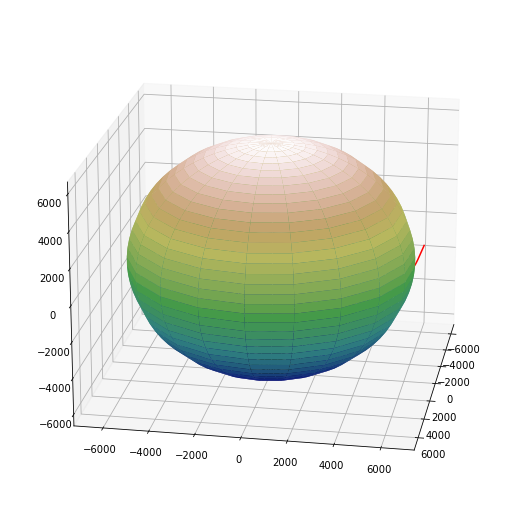

In [14]:
fi_b_list = list()
r_b_list = list()
x_list =list()
y_list =list()

for i in range(100):
    fi_b = (0+i*(teta/100))
    fi_b_list.append(fi_b)
    r_b = (2/(1+math.cos(fi_b)))
    r_b_list.append(r_b)
    x_list.append(r_b*math.cos(fi_b))
    y_list.append(r_b*math.sin(fi_b) + 6371)
    
plt.rcParams["figure.figsize"] = [10.00, 9.50]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
u, v = np.mgrid[0:2 * np.pi:20j, 0:np.pi:40j]
xs = r4 * np.cos(u) * np.sin(v)
ys = r4 * np.sin(u) * np.sin(v)
zs = r4 * np.cos(v)
ax.plot_surface(xs, ys, zs, cmap=plt.cm.gist_earth)
ax.plot3D(x_list, y_list, z, 'red')
ax.view_init(20, 10)
plt.show()

# Расчёт перелёта по схеме Гомана

In [15]:
#Часть4 Расчет перелёта Земля-Юпитер по схеме Гомана

v_p = np.sqrt((((V1)**2)+((V)**2))/2)

dv_1 = V1*((V1/v_p)-1) #1прирщение скорости
print('dv_1 = ', dv_1)

dv_2 = V*(1-(V/v_p)) #2прирщение скорости
print('dv_2 = ', dv_2)

v_sum = dv_1+dv_2

dv_1 =  [8.9124799]
dv_2 =  [5.71138328]


In [16]:
m_1 = 1-math.exp(-v_sum/dv_1)
m_2 = 1-math.exp(-v_sum/dv_2)

print('m_1 = ', m_1)
print('m_2 = ', m_2)

m_1 =  0.8061808679409507
m_2 =  0.9227320933755635


In [17]:
r1

array([1.46618233e+08])

In [811]:
r=778.33e6
r1=149.6e6
ec = (r-r1)/(r+r1)
a2 = r/(1+ec)
c = ec * a2
b = (a2*a2 - c*c)**0.5

center = a2 - r1

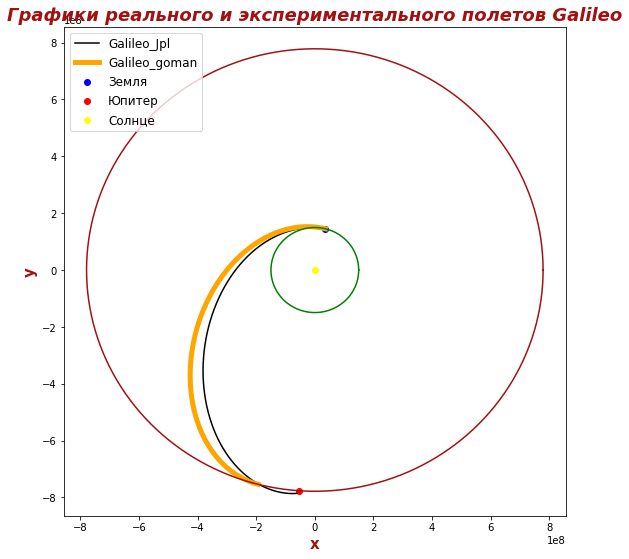

In [812]:
alpha = np.asarray(list(range(0,180)))*(math.pi/180)
x5 = -center + a2*np.cos(alpha)
y5 = b*np.sin(alpha)

rotation_angle = math.atan(data_galileo_sun[3][0] / data_galileo_sun[2][0])
x5new = x5*math.cos(rotation_angle) - y5*math.sin(rotation_angle)
y5new = y5*math.cos(rotation_angle) + x5*math.sin(rotation_angle)


plt.figure(figsize=(9, 9))

plt.title('Графики реального и экспериментального полетов Galileo', fontsize=18, fontweight='bold', color='#a11111', fontstyle = 'italic')   
plt.xlabel('x', fontsize=15, fontweight='bold',color='#a11111')
plt.ylabel('y', fontsize=15, fontweight='bold', color='#a11111')
data_galileo_sun = pd.read_excel('data_galileo_sun.xlsx', header=None)
rad1 = 149.6e6
rad2 = 778.33e6
iks1 = rad1*math.cos(76.1135*math.pi/180)
igrek1 = rad1*math.sin(76.1678*math.pi/180)
iks2 = rad2*math.cos(266*math.pi/180)
igrek2 = rad2*math.sin(266*math.pi/180)

planet_1_x = list()
planet_1_y = list()
for i in range(0, 361):
    x_dot = rad1 * np.cos(i*math.pi/180)
    y_dot = rad1 * np.sin(i*math.pi/180)
    planet_1_x.append(x_dot)
    planet_1_y.append(y_dot)
    

planet_2_x = list()
planet_2_y = list()
for i in range(0, 361):
    x_dot = rad2 * np.cos(i*math.pi/180)
    y_dot = rad2 * np.sin(i*math.pi/180)
    planet_2_x.append(x_dot)
    planet_2_y.append(y_dot)
    
plt.scatter(iks1, igrek1, color = 'blue')
plt.scatter(iks2, igrek2, color = 'red')
plt.scatter(0, 0, color = 'yellow')
plt.plot(data_galileo_sun[2].values, data_galileo_sun[3].values, 'black' )
plt.plot(x5new, y5new, color='orange', lw=5)
plt.legend(['Galileo_Jpl','Galileo_goman','Земля','Юпитер','Солнце'], loc=2, fontsize=12)
 
plt.plot(planet_2_x, planet_2_y, color = '#a11111')
plt.plot(planet_1_x, planet_1_y, color = 'green')

# Расчёт погрешности для схемы Гомана

In [816]:
# На траектории Гомана у нас 180 точек, а из JPL 1093 (значение может быть другое)
# нужно привести к одному значению, то есть добавить точек в перелёте Гомана

In [817]:
# равномерно распределяем углы вдоль траектории Гомана (от нуля до ПИ)
alpha_list = list()
for i in range(1093):
    alpha = i * math.pi / 1092
    alpha_list.append(alpha)
alpha_list = np.array(alpha_list)
alpha_list

array([0.00000000e+00, 2.87691635e-03, 5.75383270e-03, ...,
       3.13583882e+00, 3.13871574e+00, 3.14159265e+00])

In [818]:
# задаём полуэллипс Гомана

x5= -center + a2*np.cos(alpha_list)
y5 = b*np.sin(alpha_list)

rotation_angle = math.atan(data_galileo_sun[3][0] / data_galileo_sun[2][0])
x5new = x5*math.cos(rotation_angle) - y5*math.sin(rotation_angle)
y5new = y5*math.cos(rotation_angle) + x5*math.sin(rotation_angle)

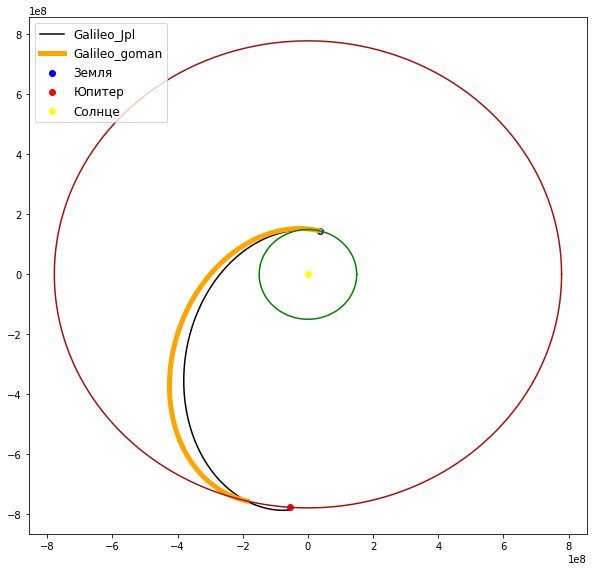

In [819]:
# проверим визуально, всё ли хорошо

plt.scatter(iks1, igrek1, color = 'blue')
plt.scatter(iks2, igrek2, color = 'red')
plt.scatter(0, 0, color = 'yellow')
plt.plot(data_galileo_sun[2].values, data_galileo_sun[3].values, 'black' )
plt.plot(x5new, y5new, color='orange', lw=5)
plt.legend(['Galileo_Jpl','Galileo_goman','Земля','Юпитер','Солнце'], loc=2, fontsize=12)
 
plt.plot(planet_2_x, planet_2_y, color = '#a11111')
plt.plot(planet_1_x, planet_1_y, color = 'green')

In [829]:
# пересчитываем траекторию по Гоману в полярные координаты

r_hom = np.sqrt(np.array(x5new)**2 + np.array(y5new)**2)
angle_hom = list()
for i in range(len(y5new)):
    if x5new[i] > 0 and y5new[i] >= 0:
        angle_hom.append(math.atan(y5new[i]/x5new[i]))
    if x5new[i] < 0 and y5new[i] >= 0:
        angle_hom.append(math.pi - math.atan(abs(y5new[i]/x5new[i])))
    if x5new[i] < 0 and y5new[i] < 0:
        angle_hom.append(math.pi + math.atan(abs(y5new[i]/x5new[i])))
    if x5new[i] > 0 and y5new[i] < 0:
        angle_hom.append(2*math.pi - math.atan(abs(y5new[i]/x5new[i])))
    if x5new[i] == 0 and y5new[i] > 0:
        angle_hom.append(math.pi/2)
    if x5new[i] == 0 and y5new[i] < 0:
        angle_hom.append(3*math.pi/2)
angle_hom = np.array(angle_hom)

In [832]:
# пересчитываем данные из JPL в полярные коориданты

r_jpl = np.sqrt(np.array(data_galileo_sun[2].values)**2 + np.array(data_galileo_sun[3].values)**2)
angle_jpl = list()
for i in range(len(data_galileo_sun[2].values)):
    if data_galileo_sun[2].values[i] > 0 and data_galileo_sun[3].values[i] >= 0:
        angle_jpl.append(math.atan(data_galileo_sun[3].values[i]/data_galileo_sun[2].values[i]))
    if data_galileo_sun[2].values[i] < 0 and data_galileo_sun[3].values[i] >= 0:
        angle_jpl.append(math.pi - math.atan(abs(data_galileo_sun[3].values[i]/data_galileo_sun[2].values[i])))
    if data_galileo_sun[2].values[i] < 0 and data_galileo_sun[3].values[i] < 0:
        angle_jpl.append(math.pi + math.atan(abs(data_galileo_sun[3].values[i]/data_galileo_sun[2].values[i])))
    if data_galileo_sun[2].values[i] > 0 and data_galileo_sun[3].values[i] < 0:
        angle_jpl.append(2*math.pi - math.atan(abs(data_galileo_sun[3].values[i]/data_galileo_sun[2].values[i])))
    if data_galileo_sun[2].values[i] == 0 and data_galileo_sun[3].values[i] > 0:
        angle_jpl.append(math.pi/2)
    if data_galileo_sun[2].values[i] == 0 and data_galileo_sun[3].values[i] < 0:
        angle_jpl.append(3*math.pi/2)
angle_jpl = np.array(angle_jpl)

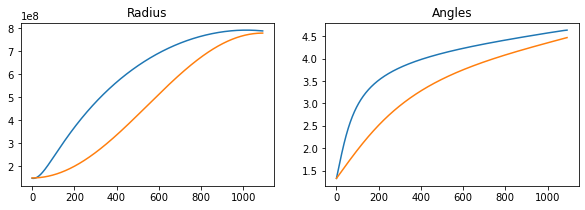

In [797]:
# сравним визуально графики для радиусов и углов

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

ax1.plot(r_jpl)
ax1.plot(r_hom)
ax1.set_title('Radius')

ax2.set_title('Angles')
ax2.plot(angle_jpl)
ax2.plot(angle_hom)

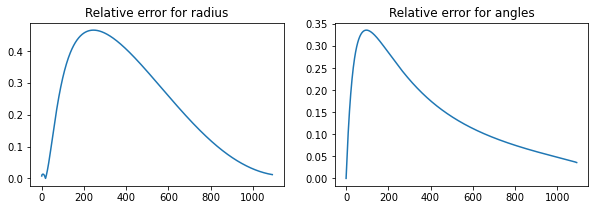

In [798]:
# выведем график относительных погрешностей

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

ax1.plot(abs((r_hom - r_jpl) / r_jpl))
ax1.set_title('Relative error for radius')

ax2.set_title('Relative error for angles')
ax2.plot(abs((angle_hom - angle_jpl) / angle_jpl))

In [803]:
radius_error = np.mean(abs((r_hom - r_jpl) / r_jpl))
angle_error = np.mean(abs((angle_hom - angle_jpl) / angle_jpl))
error = (radius_error + angle_error)/2

In [804]:
error

0.19617528920315175

# Расчёт перелёта по Ламберту

In [67]:
# зададим радиус-векторы

rad1 = np.array([iks1, igrek1])
rad2 = np.array([iks2, igrek2])
D = rad2 - rad1
# определим угловые величины

cos_fi = np.dot(rad1, rad2) / (np.linalg.norm(rad2) * np.linalg.norm(rad1))
sin_fi = np.linalg.norm(np.cross(rad1, rad2)) / (np.linalg.norm(rad2) * np.linalg.norm(rad1))
v_p = np.cross(rad1, rad2)
v_sign = math.copysign(1, v_p)
sin_fi = sin_fi * v_sign

if math.copysign(1, sin_fi) >= 0:
    fi = math.acos(cos_fi)
if math.copysign(1, sin_fi) < 0:
    fi = 2*math.pi - math.acos(cos_fi)
    # задаём начальное приближение для решения уравнения Ламберта

a_min = (np.linalg.norm(rad1) + np.linalg.norm(rad2) + np.linalg.norm(D)) / 4
delta_min = math.acos(1-(np.linalg.norm(rad1) + np.linalg.norm(rad2) - np.linalg.norm(D))/(2*a_min))

t_pz = a_min**(1.5)*(math.pi - math.copysign(1, sin_fi)*(delta_min - math.sin(delta_min)))/np.sqrt(mu)
t_p = 1092 * 24*60*60

In [56]:
while t_pz < t_p:
    a_min = a_min + 100
    eps_v = math.acos(1-((np.linalg.norm(rad1) + np.linalg.norm(rad2) + np.linalg.norm(D))/(2*a_min)))
    delta_v = math.acos(1-((np.linalg.norm(rad1) + np.linalg.norm(rad2) - np.linalg.norm(D))/(2*a_min)))
    
    if t_p < t_pz:
        eps = eps_v
    if t_p > t_pz:
        eps = 2*math.pi - eps_v
    if t_p == t_pz:
        eps = math.pi
    if fi < math.pi:
        delta = delta_v
    if fi > math.pi:
        delta = - delta_v
    if fi == math.pi:
        delta = 0
    t_pz = (a_min**1.5)*(eps - delta - (math.sin(eps) - math.sin(delta)))/np.sqrt(mu)

In [57]:
t_pz/(24*60*60)

1092.001786912887

In [58]:
pkek = np.linalg.norm(rad1) * np.linalg.norm(rad2) * ((math.sin(fi/2))**2) /(a_min * (math.sin((eps - delta)/2))**2)
ex = np.sqrt(1 - pkek / a_min)

cos_teta_1 = (pkek - np.linalg.norm(rad1)) / (ex * np.linalg.norm(rad1))
cos_teta_2 = (pkek - np.linalg.norm(rad2)) / (ex * np.linalg.norm(rad2))
sin_teta_1 = (math.cos(fi) * cos_teta_1 - cos_teta_2) / math.sin(fi)

if math.copysign(1, sin_teta_1) >= 0:
    teta_1 = math.acos(cos_teta_1)
if math.copysign(1, sin_teta_1) < 0:
    teta_1 = 2 * math.pi - math.acos(cos_teta_1)
    
teta_2 = teta_1 + fi

lambda0 = math.acos(iks1*(1+ex*math.cos(teta_1))/pkek) - teta_1
lambda02 = math.asin(igrek1*(1+ex*math.cos(teta_1))/pkek) - teta_1

In [59]:
# Проверка 2. Должны получить радиусы начальной и конечной орбиты

print (pkek / (1 + ex * math.cos(teta_1)))
print (pkek / (1 + ex * math.cos(teta_2)))

149632969.02895632
778330000.0000005


In [139]:
# Теперь определяем саму траекторию

Lambert_transfer_x = list()
Lambert_transfer_y = list()


start = int(teta_1 * 180 / 3.1416)
finish = int(teta_2 * 180 / 3.1416) + 1 

for i in range(1093):
    teta_i = (start + i * (finish - start) /1092) * math.pi / 180
    rg_i = pkek / (1 + ex * math.cos(teta_i))
    Lambert_x = rg_i * math.cos(teta_i + lambda0)
    Lambert_y = rg_i * math.sin(teta_i + lambda0)
    Lambert_transfer_x.append(Lambert_x)
    Lambert_transfer_y.append(Lambert_y)

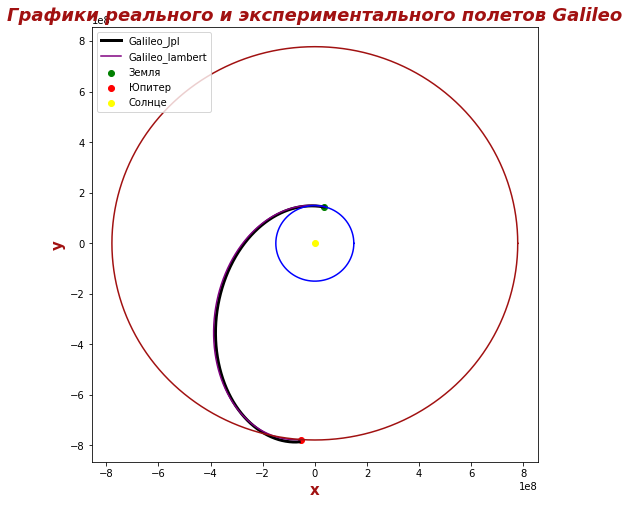

In [192]:
plt.figure(figsize=(8, 8))
plt.title('Графики реального и экспериментального полетов Galileo', fontsize=18, fontweight='bold', color='#a11111', fontstyle = 'italic')   
plt.xlabel('x', fontsize=15, fontweight='bold',color='#a11111')
plt.ylabel('y', fontsize=15, fontweight='bold', color='#a11111')
plt.plot(data_galileo_sun[2].values, data_galileo_sun[3].values, color='black', lw=3)
plt.plot(Lambert_transfer_x, Lambert_transfer_y, color = 'purple')
plt.scatter(iks1, igrek1, color = 'green')
plt.scatter(iks2, igrek2, color = 'red')
plt.scatter(0, 0, color = 'yellow')
plt.legend(['Galileo_Jpl','Galileo_lambert','Земля','Юпитер','Солнце'], loc=2, fontsize=10)
plt.plot(planet_2_x, planet_2_y, color = '#a11111')
plt.plot(planet_1_x, planet_1_y, color = 'blue')

# Расчёт погрешности по Ламберту

In [743]:
# пересчитываем траекторию в полярные координаты

r_lam = np.sqrt(np.array(Lambert_transfer_x)**2 + np.array(Lambert_transfer_y)**2)
angle_lam = list()
for i in range(len(Lambert_transfer_y)):
    if Lambert_transfer_x[i] > 0 and Lambert_transfer_y[i] >= 0:
        angle_lam.append(math.atan(Lambert_transfer_y[i]/Lambert_transfer_x[i]))
    if Lambert_transfer_x[i] < 0 and Lambert_transfer_y[i] >= 0:
        angle_lam.append(math.pi - math.atan(abs(Lambert_transfer_y[i]/Lambert_transfer_x[i])))
    if Lambert_transfer_x[i] < 0 and Lambert_transfer_y[i] < 0:
        angle_lam.append(math.pi + math.atan(abs(Lambert_transfer_y[i]/Lambert_transfer_x[i])))
    if Lambert_transfer_x[i] > 0 and Lambert_transfer_y[i] < 0:
        angle_lam.append(2*math.pi - math.atan(abs(Lambert_transfer_y[i]/Lambert_transfer_x[i])))
    if Lambert_transfer_x[i] == 0 and Lambert_transfer_y[i] > 0:
        angle_lam.append(math.pi/2)
    if Lambert_transfer_x[i] == 0 and Lambert_transfer_y[i] < 0:
        angle_lam.append(3*math.pi/2)
angle_lam = np.array(angle_lam)

In [744]:
cos = np.vectorize(lambda t: math.cos(t))(angle_lam)
sin = np.vectorize(lambda t: math.sin(t))(angle_lam)

X = r_lam * cos
Y = r_lam * sin

In [745]:
# решаем СЛАУ, чтобы получить коэффициенты эллипса, приближающего траекторию Ламберта

from scipy.linalg import solve

A = np.array(

       [

           [X[0]**2, X[0] * Y[0], Y[0]**2, X[0], Y[0]],

           [X[400]**2, X[400] * Y[400], Y[400]**2, X[400], Y[400]],

           [X[700]**2, X[700] * Y[700], Y[700]**2, X[700], Y[700]],

           [X[840]**2, X[840] * Y[840], Y[840]**2, X[840], Y[840]],
           
           [X[1092]**2, X[1092] * Y[1092], Y[1092]**2, X[1092], Y[1092]]

       ])

B = np.array([-1, -1, -1, -1, -1]).reshape((5, 1))

x = solve(A, B)
x

array([[-1.57642415e-17],
       [ 2.00795629e-18],
       [-8.70224624e-18],
       [-7.48219634e-10],
       [-5.36729109e-09]])

In [ ]:
# вычисляем среднее необходимое приращение по углу

d_fi = fi / 1092
fi_0 = math.atan(Lambert_transfer_y[0] / Lambert_transfer_x[0])

In [747]:
# подставляем в полученное уравнение эллипса иксовые координаты из JPL

ans_list_1 = list()

for j in range(1093):
   
    b = x[3] * cos[j] + x[4] * sin[j]
    a = x[0] * cos[j] * cos[j] + x[1]*cos[j]*sin[j] + x[2]*sin[j]*sin[j]
    c = 1
   
    D = b**2 - 4 * a * c
    
    ans_1 = (-b - np.sqrt(D)) / (2*a)

    
    ans_1 = ans_1[0]

    ans_list_1.append(ans_1)

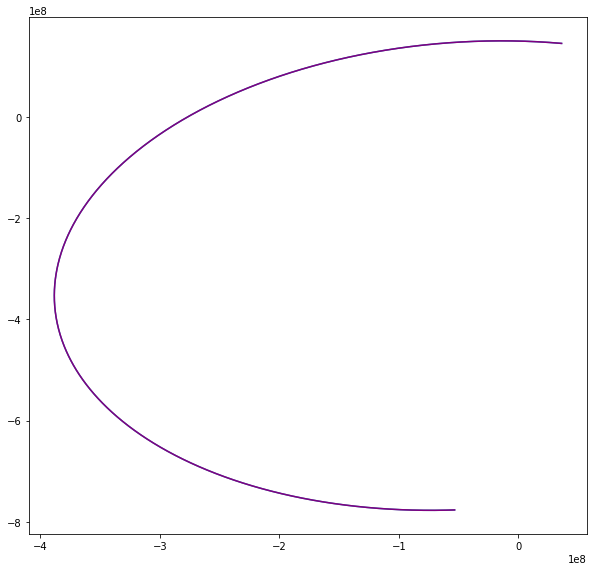

In [748]:
# проверим визуально, сопадают ли траектории (Ламберта численная и полученный эллипс)

plt.plot(ans_list_1 * cos, ans_list_1 * sin)

plt.plot(Lambert_transfer_x, Lambert_transfer_y, color = 'purple')

In [749]:
# переведём координаты JPL в полярные

In [750]:
r_jpl = np.sqrt(np.array(data_galileo_sun[2].values)**2 + np.array(data_galileo_sun[3].values)**2)
angle_jpl = list()
for i in range(len(data_galileo_sun[2].values)):
    if data_galileo_sun[2].values[i] > 0 and data_galileo_sun[3].values[i] >= 0:
        angle_jpl.append(math.atan(data_galileo_sun[3].values[i]/data_galileo_sun[2].values[i]))
    if data_galileo_sun[2].values[i] < 0 and data_galileo_sun[3].values[i] >= 0:
        angle_jpl.append(math.pi - math.atan(abs(data_galileo_sun[3].values[i]/data_galileo_sun[2].values[i])))
    if data_galileo_sun[2].values[i] < 0 and data_galileo_sun[3].values[i] < 0:
        angle_jpl.append(math.pi + math.atan(abs(data_galileo_sun[3].values[i]/data_galileo_sun[2].values[i])))
    if data_galileo_sun[2].values[i] > 0 and data_galileo_sun[3].values[i] < 0:
        angle_jpl.append(2*math.pi - math.atan(abs(data_galileo_sun[3].values[i]/data_galileo_sun[2].values[i])))
    if data_galileo_sun[2].values[i] == 0 and data_galileo_sun[3].values[i] > 0:
        angle_jpl.append(math.pi/2)
    if data_galileo_sun[2].values[i] == 0 and data_galileo_sun[3].values[i] < 0:
        angle_jpl.append(3*math.pi/2)
angle_jpl = np.array(angle_jpl)

In [755]:
# теперь будем брать углы из JPL и подставлять в наш эллипс

ans_list = list()

for j in range(1093):
   
    b = x[3] * math.cos(angle_jpl[j]) + x[4] * math.sin(angle_jpl[j])
    a = x[0] * math.cos(angle_jpl[j]) * math.cos(angle_jpl[j]) + x[1]*math.cos(angle_jpl[j])*math.sin(angle_jpl[j]) + x[2]*math.sin(angle_jpl[j])*math.sin(angle_jpl[j])
    c = 1
   
    D = b**2 - 4 * a * c
    
    ans = (-b - np.sqrt(D)) / (2*a)

    
    ans = ans[0]

    ans_list.append(ans)

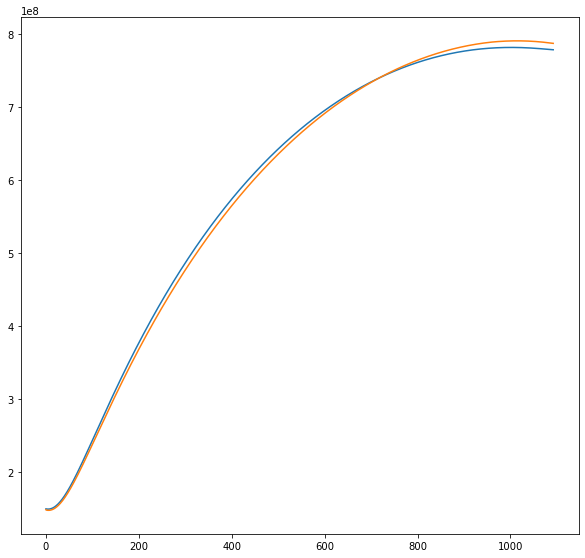

In [759]:
# сравним визуально графики для радиусов

plt.plot(ans_list)
plt.plot(r_jpl)

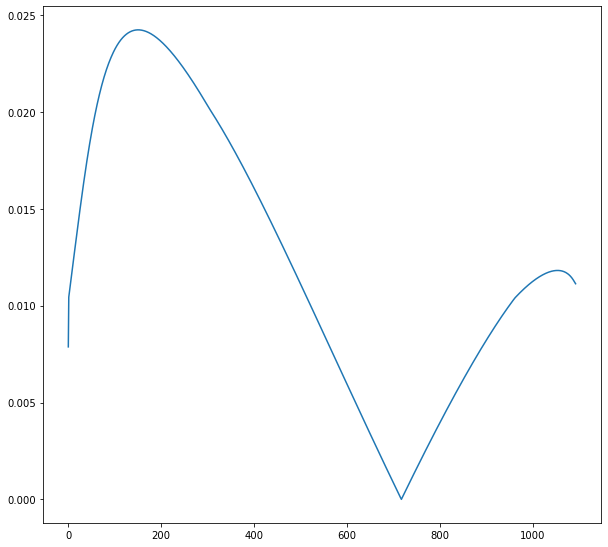

In [764]:
# выведем график относительных погрешностей

plt.plot(abs((ans_list - r_jpl) / r_jpl))

In [765]:
# посчитаем среднюю погрешность по радиусу
np.mean(abs((ans_list - r_jpl) / r_jpl))

0.012500751652655163

In [767]:
# По углу погрешность смысла смотреть нет, так как мы их брали одинаковые.
# Они уже учтены в погрешности по радиусу